In [15]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from networkx.drawing.nx_agraph import graphviz_layout

count_plot_limit = 50

%matplotlib inline

In [3]:
df = pd.read_csv('../data/patents-clean.csv')
df.ipc = df.ipc.apply(eval)

## IPC tags discovery

### Basic statistics

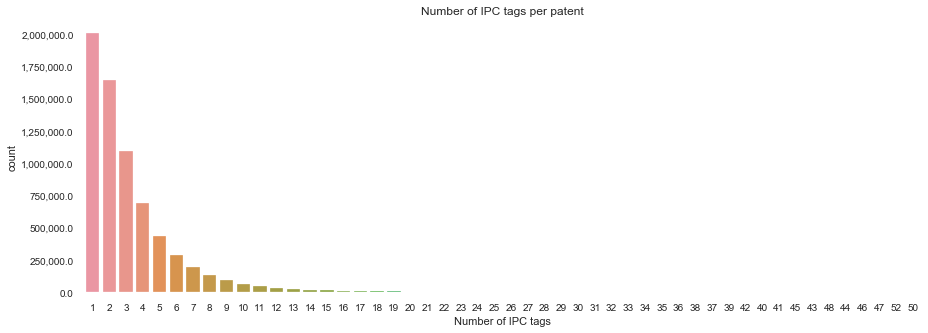

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(df.ipc.apply(len), order = df.ipc.apply(len).value_counts().iloc[:count_plot_limit].index)
plt.xlabel('Number of IPC tags')
plt.title('Number of IPC tags per patent')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
plt.savefig('../reports/figures/ipc_tags_count.png', dpi = 300)

In [20]:
df.ipc.apply(len).describe().apply("{0:4f}".format)

count    6881033.000000
mean           3.347120
std            3.604722
min            1.000000
25%            1.000000
50%            2.000000
75%            4.000000
max          249.000000
Name: ipc, dtype: object

### Levels statistics

In [4]:
# ipc_tags.csv is generated by generate_ipc_tags.py
ipc_num = pd.read_csv('../resources/ipc_tags.csv', dtype=str)

In [11]:
len(ipc_num)

23031640

In [12]:
# Number of distinct tags per level 
ipc_num.nunique()

pub_number    6881033
ipc             72141
l0                  8
l1                 56
l2                 23
l3                334
l4               2074
l0-1              145
l0-2              669
l0-3             8087
dtype: int64

In [13]:
ipc_num_not_full = ipc_num[ipc_num.l3.isna()]
ipc_num_not_full

pub_number    ipc l0  l1 l2   l3   l4 l0-1  l0-2  l0-3
10890       EP-3424436-A1  A61M/  A  61  M  NaN  NaN  A61  A61M  A61M
10940       EP-3424472-A1  A61F/  A  61  F  NaN  NaN  A61  A61F  A61F
11230       EP-3403820-A3  C03C/  C  03  C  NaN  NaN  C03  C03C  C03C
93710       EP-3351277-A1  A61M/  A  61  M  NaN  NaN  A61  A61M  A61M
96791       EP-3348526-A1  C03C/  C  03  C  NaN  NaN  C03  C03C  C03C
104609      EP-2623138-A3  A61F/  A  61  F  NaN  NaN  A61  A61F  A61F
116163      EP-3336078-A1  A61K/  A  61  K  NaN  NaN  A61  A61K  A61K
129386      EP-3326673-A1  A61M/  A  61  M  NaN  NaN  A61  A61M  A61M
152276      EP-3312672-A1  G03F/  G  03  F  NaN  NaN  G03  G03F  G03F
172889      EP-3299334-A1  C01B/  C  01  B  NaN  NaN  C01  C01B  C01B
178096      EP-3295904-A1  A61B/  A  61  B  NaN  NaN  A61  A61B  A61B
188599      EP-3290921-A1  G01N/  G  01  N  NaN  NaN  G01  G01N  G01N
198394    JP-2018028675-A  G09G/  G  09  G  NaN  NaN  G09  G09G  G09G
253685      EP-3235827-A3  A61K/  A  61  K  NaN  NaN  A61  A61K  A61K
276763      EP-3248550-A1  A61B/  A  61  B  NaN  NaN  A61  A61B  A61B
276858      EP-3249154-A1  H01Q/  H  01  Q  NaN  NaN  H01  H01Q  H01Q
276860      EP-3249154-A1  E21B/  E  21  B  NaN  NaN  E21  E21B  E21B
276862      EP-3249154-A1  G01V/  G  01  V  NaN  NaN  G01  G01V  G01V
276863      EP-3249154-A1  H01L/  H  01  L  NaN  NaN  H01  H01L  H01L
293804    JP-2017204012-A  G02B/  G  02  B  NaN  NaN  G02  G02B  G02B
300468      EP-3241490-A1  G01N/  G  01  N  NaN  NaN  G01  G01N  G01N
312475    JP-2017195608-A  G06F/  G  06  F  NaN  NaN  G06  G06F  G06F
326512      EP-3231445-A1  A61K/  A  61  K  NaN  NaN  A61  A61K  A61K
341246      EP-2589335-A3  A61K/  A  61  K  NaN  NaN  A61  A61K  A61K
349202      EP-3223074-A1  G03F/  G  03  F  NaN  NaN  G03  G03F  G03F
463752      EP-3189813-A1  A61F/  A  61  F  NaN  NaN  A61  A61F  A61F
463769      EP-3189781-A1  A61M/  A  61  M  NaN  NaN  A61  A61M  A61M
484465      EP-3150228-A3  A61K/  A  61  K  NaN  NaN  A61  A61K  A61K
527495    JP-2017101250-A  C08L/  C  08  L  NaN  NaN  C08  C08L  C08L
527504    JP-2017101250-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
...                   ...    ... ..  .. ..  ...  ...  ...   ...   ...
22961713     GB-1064068-A  C12C/  C  12  C  NaN  NaN  C12  C12C  C12C
22962077     GB-1062076-A  C21C/  C  21  C  NaN  NaN  C21  C21C  C21C
22964011     GB-1043519-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22964280     GB-1041334-A  C10M/  C  10  M  NaN  NaN  C10  C10M  C10M
22965335     GB-1034607-A  E04C/  E  04  C  NaN  NaN  E04  E04C  E04C
22965689     GB-1032279-A  H04M/  H  04  M  NaN  NaN  H04  H04M  H04M
22967636     GB-1018665-A  A61K/  A  61  K  NaN  NaN  A61  A61K  A61K
22968823     GB-1011554-A  C07D/  C  07  D  NaN  NaN  C07  C07D  C07D
22969281     GB-1007682-A  E04B/  E  04  B  NaN  NaN  E04  E04B  E04B
22969304     GB-1007665-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22972110      GB-988001-A  C07D/  C  07  D  NaN  NaN  C07  C07D  C07D
22972201      GB-986811-A  C07D/  C  07  D  NaN  NaN  C07  C07D  C07D
22972854      GB-982050-A  A47J/  A  47  J  NaN  NaN  A47  A47J  A47J
22973180      GB-979184-A  A61J/  A  61  J  NaN  NaN  A61  A61J  A61J
22973565      GB-976304-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22973828      GB-974164-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22973882      GB-974258-A  B27C/  B  27  C  NaN  NaN  B27  B27C  B27C
22974118      GB-972407-A  D21G/  D  21  G  NaN  NaN  D21  D21G  D21G
22974119      GB-972407-A  B41G/  B  41  G  NaN  NaN  B41  B41G  B41G
22975505      GB-961305-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22975729      GB-959807-A  G03C/  G  03  C  NaN  NaN  G03  G03C  G03C
22975828      GB-958186-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22978645      GB-938365-A  H01C/  H  01  C  NaN  NaN  H01  H01C  H01C
22978995      GB-935405-A  C07C/  C  07  C  NaN  NaN  C07  C07C  C07C
22980731      GB-923564-A  H01G/  H  01  G  NaN  NaN  H01  H01G  H01G
22985424      GB-884105-A

In [11]:
def plot_value_count(col, figsize=(5, 50)):
    cnt = ipc_num[col].value_counts().sort_values()
    ax = cnt.plot(kind='barh', figsize=figsize)
#     ax.autoscale(enable=True, axis='both', tight=False)
    for i in ax.patches:
        plt.text(i.get_width() + 100000, i.get_y()+0.2, f'{round((i.get_width()), 2):,}', fontsize=12, color='black')
    ax.set_xlim([0, max(cnt) + 1000000])
    plt.xticks(rotation=-45)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('Number of patents')
    plt.ylabel('IPC tags')
    
#     plt.tight_layout()

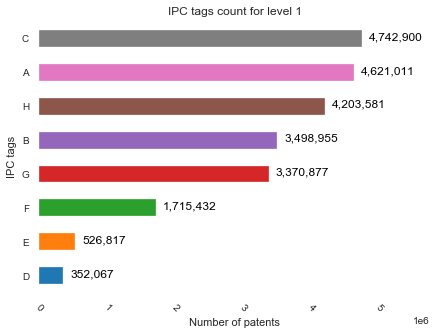

In [12]:
plot_value_count('l0', figsize=(7, 5))
plt.title('IPC tags count for level 1')
plt.savefig('../reports/figures/ipc_tags_count_1.png', dpi = 300)

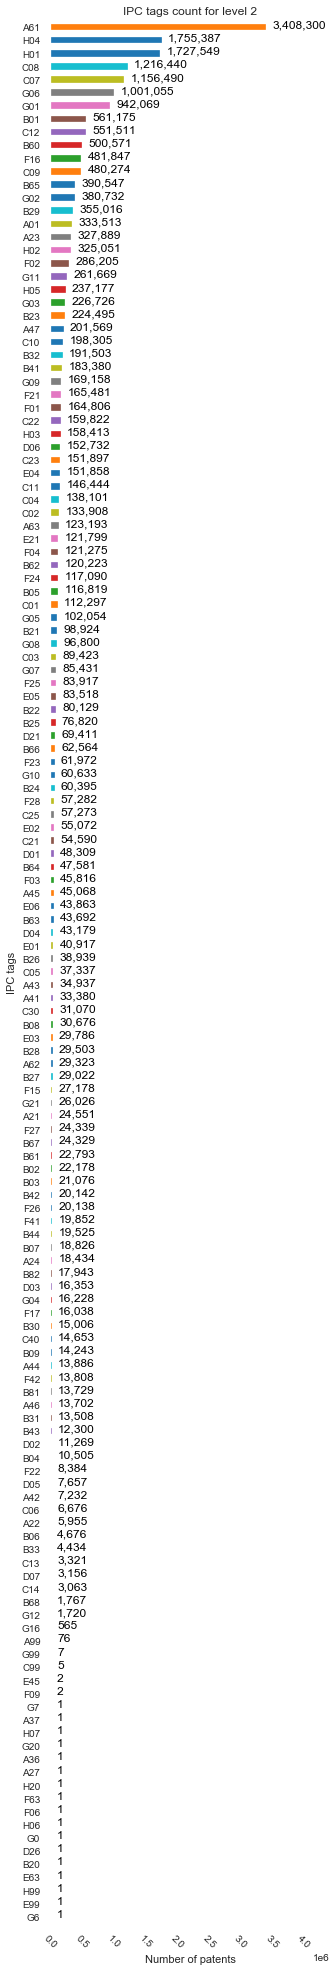

In [13]:
plot_value_count('l0-1', figsize=(5, 35))
plt.title('IPC tags count for level 2')
plt.savefig('../reports/figures/ipc_tags_count_2.png', dpi = 300)

In [ ]:
plot_value_count('l0-2', figsize=(5, 120))
plt.title('IPC tags count for level 3')
plt.savefig('../reports/figures/ipc_tags_count_3.png', dpi = 300)

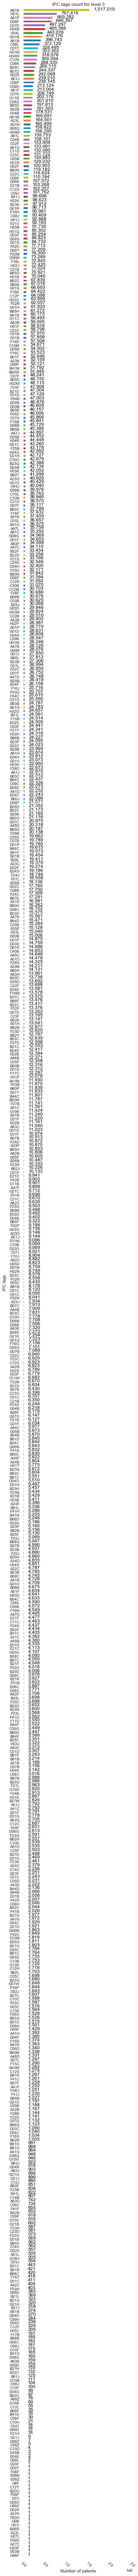

In [14]:
## Tree visualisation

## Tree visualisation

In [6]:
ipc_tree_1 = ipc_num[['l0', 'l0-1']].drop_duplicates()
ipc_tree_1.columns = ['s', 't']

ipc_tree_2 = ipc_num[['l0-1', 'l0-2']].drop_duplicates()
ipc_tree_2.columns = ['s', 't']

ipc_tree_3 = ipc_num[~ipc_num.l3.isna()][['l0-2', 'l0-3']].drop_duplicates()
ipc_tree_3.columns = ['s', 't']

ipc_tree_4 = ipc_num[~(ipc_num.l4.isna() & ipc_num.l3.isna())][['l0-3', 'ipc']].drop_duplicates()
ipc_tree_4.columns = ['s', 't']

root_tree = pd.DataFrame([['root', level_val] for level_val in ipc_tree_1['s'].unique()], columns=['s', 't'])

In [7]:
root_tree['level'] = 1
ipc_tree_1['level'] = 4
ipc_tree_2['level'] = 8
ipc_tree_3['level'] = 32
ipc_tree_4['level'] = 64

In [8]:
factors = len(root_tree), len(ipc_tree_1) / len(root_tree), len(ipc_tree_3) / len(ipc_tree_2), len(ipc_tree_4) / len(ipc_tree_3)
print(f'Branching factors: {factors}. Mean: {np.mean(factors)}')

Branching factors: (8, 18.125, 11.237668161434977, 9.520085129023677). Mean: 11.720688322614663


In [58]:
def draw_tree(levels, val_counts, title, figsize, font_sizes_factor=70, edge_factor = 80000, node_factor = 1500):

    ipc_tree = pd.concat(levels, axis=0)
    G = nx.from_pandas_edgelist(ipc_tree, 's', 't')
    
    freq = pd.concat(val_counts)
    freq = freq.loc[~freq.index.duplicated(keep='first')]
    edge_weights = np.array([freq[v] for u,v in G.edges])
    node_weights = np.append(len(ipc_num), np.array([freq[n] for n in G.nodes if n!='root'])) / node_factor
    font_sizes = 1 / np.append(1.0, ipc_tree.level) * font_sizes_factor 

    pos = graphviz_layout(G, prog='twopi', args='')
    plt.figure(figsize=figsize)
    nx.draw(G, pos, node_size=10, alpha=.8, node_color="blue", with_labels=False, width=edge_weights/edge_factor)
    
    for i, (k,v) in enumerate(pos.items()):
        nx.draw_networkx_nodes(G.subgraph([k]), pos={k: v}, node_size=node_weights[i], node_color='black', alpha=1)
        if k != 'root':
            nx.draw_networkx_labels(G.subgraph([k]), pos={k: v}, font_size=font_sizes[i], font_color='red')
    plt.axis('equal')
    plt.savefig(f'../reports/figures/{title}')
    plt.show()

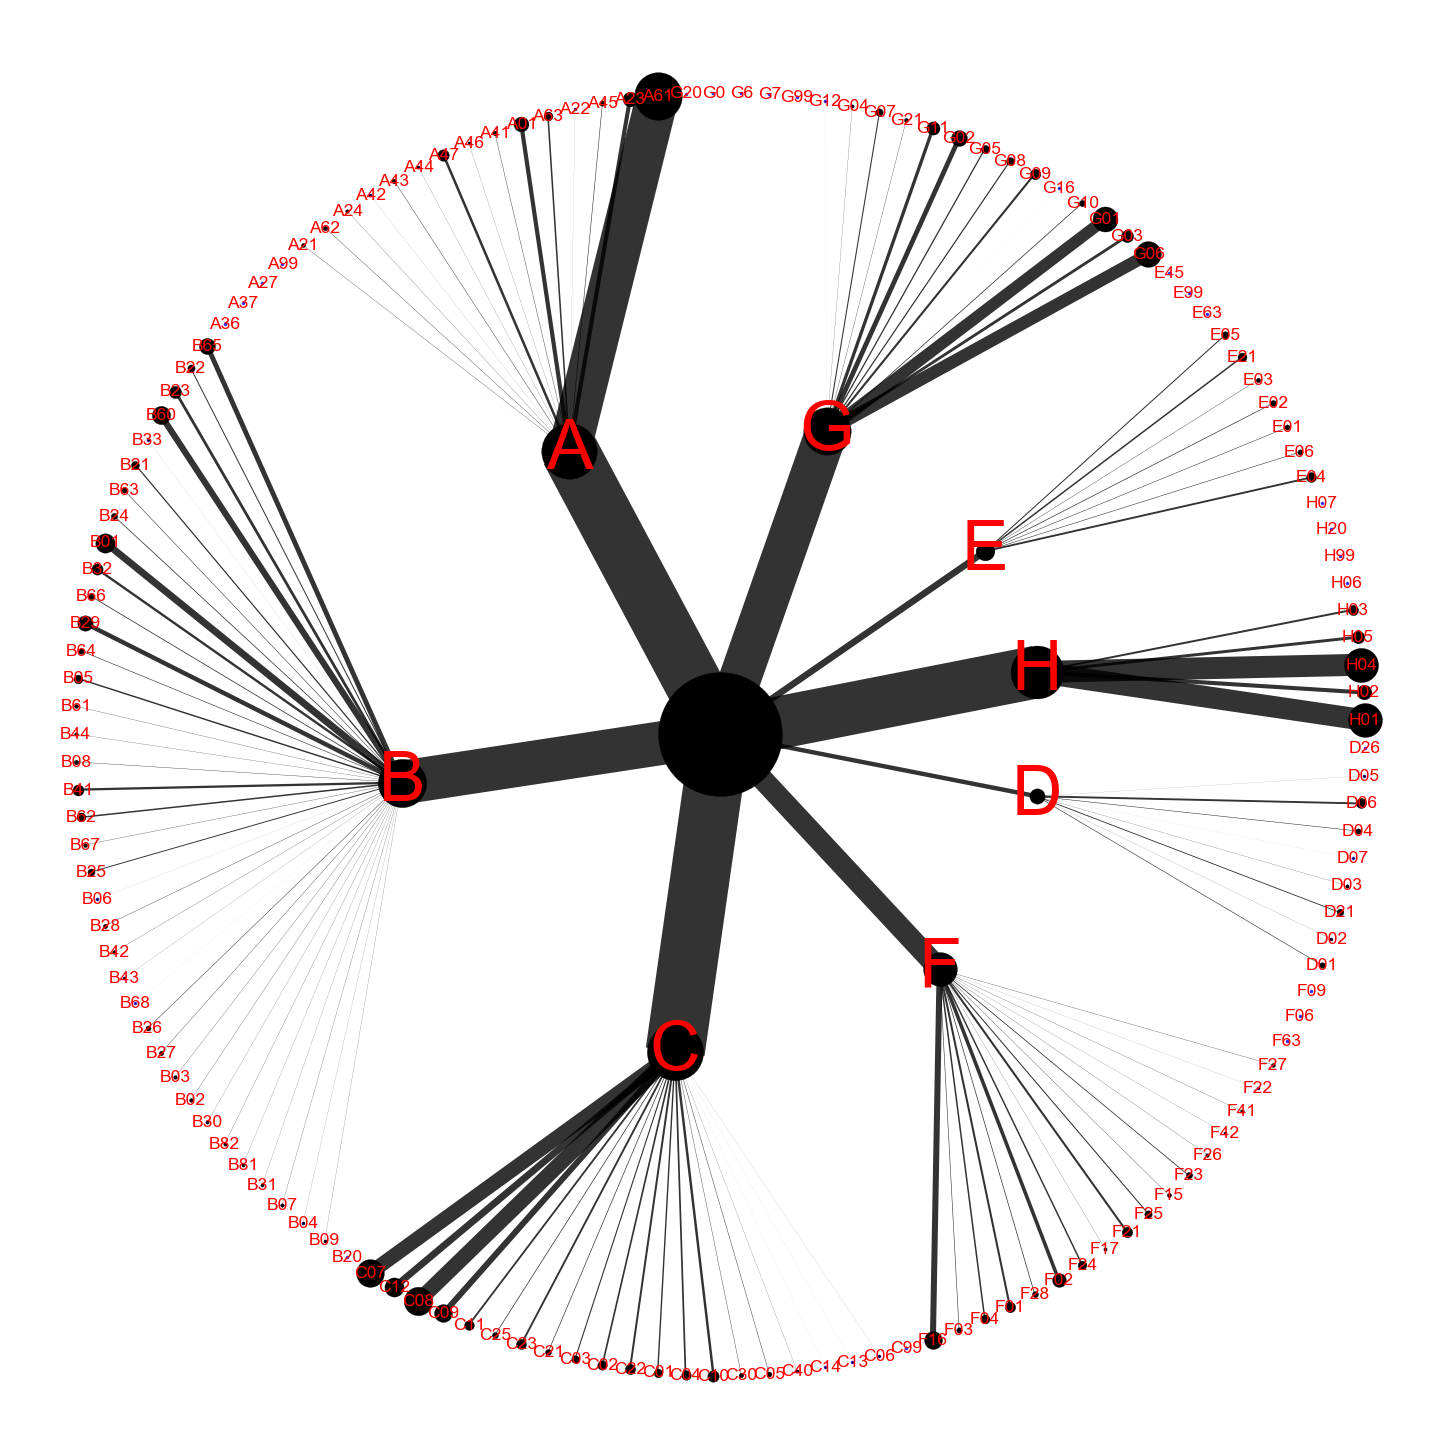

In [55]:
draw_tree([root_tree, ipc_tree_1], 
          [ipc_num['l0'].value_counts(), ipc_num['l0-1'].value_counts()], 
          'circular_tree_1.png', 
          (20, 20))

In [ ]:
draw_tree([root_tree, ipc_tree_1, ipc_tree_2], 
          [ipc_num['l0'].value_counts(), ipc_num['l0-1'].value_counts(), ipc_num['l0-2'].value_counts()], 
          'circular_tree_2.png', 
          (40, 40), 
          font_sizes_factor=90)

In [ ]:
draw_tree([root_tree, ipc_tree_1, ipc_tree_2, ipc_tree_3], 
          [ipc_num['l0'].value_counts(), ipc_num['l0-1'].value_counts(), ipc_num['l0-2'].value_counts(), 
           ipc_num['l0-3'].value_counts()], 
          'circular_tree_3.png', 
          (90, 90), 
          font_sizes_factor=90)

In [ ]:
for lev_1 in ipc_tree_1.s.drop_duplicates():
    sub_ipc_tree_1 = ipc_tree_1[ipc_tree_1.s == lev_1]
    draw_tree([sub_ipc_tree_1, ipc_tree_2[ipc_tree_2.s.isin(sub_ipc_tree_1.t)]], 
              [ipc_num['l0'].value_counts(), ipc_num['l0-1'].value_counts(), ipc_num['l0-2'].value_counts()], 
              title = f'circular_tree_{lev_1}.png', 
              figsize = (30, 30), 
              font_sizes_factor=200)

## IPC-tags embeddings

In [18]:
import pickle
import sys
sys.path.append('../')
from src import CLEAN_PATENTS_PATH, CITATIONS_PATH, TAGS_PATH, DATA_PATH

with open(f'{TAGS_PATH}/sf=0.5.pkl', "rb") as r:
    ipc_embeddings_map = pickle.load(r)

In [19]:
ipc_embeddings_map = {k: [v] for (k, v) in ipc_embeddings_map.items()}
ipc_embeddings_df = pd.DataFrame(ipc_embeddings_map).transpose().reset_index().rename(columns={'index': 'ipc', 0: 'bert'})

In [20]:
ipc_num = pd.merge(ipc_num, ipc_embeddings_df, on='ipc', how='left')

In [21]:
missing_ipc = ipc_num.drop_duplicates(subset=['ipc']).bert.isna().sum()
all_ipc = len(ipc_num.ipc.unique())

In [22]:
print(f'Number of missing IPC tags descriptions: {missing_ipc} out of {all_ipc} tags')
print(f'Overall nuber of IPC tags: web-scrap - {len(ipc_embeddings_df[ipc_embeddings_df.ipc.str.contains("/")])}, dataset - {all_ipc}')

Number of missing IPC tags descriptions: 1680 out of 72141 tags
Overall nuber of IPC tags: web-scrap - 74503, dataset - 72141
